In [14]:
import pandas as pd
import matplotlib as plot

In [16]:
df = pd.read_csv('export/bayc/metadata_0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D.csv')

In [41]:
df.sort_values('overall_rarity_score', ascending=False).head(5)

,asset_id,attribute_count,attribute_count_rarity_score,Earring_attribute,Earring_rarity_score,Background_attribute,Background_rarity_score,Fur_attribute,Fur_rarity_score,Clothes_attribute,Clothes_rarity_score,Mouth_attribute,Mouth_rarity_score,Eyes_attribute,Eyes_rarity_score,Hat_attribute,Hat_rarity_score,overall_rarity_score
8135,8135,7,5.310674,Silver Stud,12.150668,Army Green,8.045052,Black,8.136697,Hip Hop,78.125000,Bored Unshaven Dagger,357.142857,Hypnotized,45.454545,Trippy Captain's Hat,153.846154,668.211648
2794,2794,5,3.941663,NaN,1.424299,Aquamarine,7.886435,Robot,36.900369,Cowboy Shirt,84.033613,Bored Unshaven Pizza,384.615385,Cyborg,92.592593,NaN,4.440497,615.834854
7678,7678,6,1.879346,NaN,1.424299,Purple,7.733952,Cheetah,24.509804,Sailor Shirt,35.211268,Bored Unshaven Pizza,384.615385,Robot,28.571429,King's Crown,129.870130,613.815611
8976,8976,7,5.310674,Silver Stud,12.150668,Yellow,7.794232,White,25.188917,Tweed Suit,70.921986,Bored Unshaven Pizza,384.615385,X Eyes,40.816327,Safari,54.945055,601.743244
208,208,7,5.310674,Silver Stud,12.150668,Army Green,8.045052,Pink,19.569472,Prom Dress,97.087379,Bored Unshaven Pizza,384.615385,Coins,20.876827,Fez,26.525199,574.180656


## Remove outliers

In [39]:
df = df.iloc[5:]
df.head()

,asset_id,attribute_count,attribute_count_rarity_score,Earring_attribute,Earring_rarity_score,Background_attribute,Background_rarity_score,Fur_attribute,Fur_rarity_score,Clothes_attribute,Clothes_rarity_score,Mouth_attribute,Mouth_rarity_score,Eyes_attribute,Eyes_rarity_score,Hat_attribute,Hat_rarity_score,overall_rarity_score
5,5,6,1.879346,NaN,1.424299,Army Green,8.045052,Brown,7.299270,Bayc T Red,71.428571,Dumbfounded,19.801980,X Eyes,40.816327,Bayc Flipped Brim,43.290043,193.984888
6,6,6,1.879346,NaN,1.424299,Yellow,7.794232,Cream,15.723270,Tweed Suit,70.921986,Bored,4.401408,Crazy,24.570025,S&m Hat,42.553191,169.267758
7,7,6,1.879346,NaN,1.424299,Gray,8.547009,Golden Brown,12.820513,Wool Turtleneck,41.666667,Bored,4.401408,Angry,23.148148,Stuntman Helmet,63.694268,157.581657
8,8,6,1.879346,Gold Stud,22.779043,Aquamarine,7.886435,Zombie,33.112583,NaN,5.324814,Bored,4.401408,Robot,28.571429,Beanie,17.301038,121.256096
9,9,7,5.310674,Silver Stud,12.150668,Purple,7.733952,Brown,7.299270,Stunt Jacket,56.179775,Small Grin,36.764706,Sleepy,13.315579,Seaman's Hat,23.809524,162.564149


## Total rarity curve

In [ ]:
df.sort_values('overall_rarity_score').plot(y="overall_rarity_score", figsize=(20,10), title="Total rarity curve", ylabel="Rarity score")

<AxesSubplot:title={'center':'Total rarity curve'}, ylabel='Rarity score'>

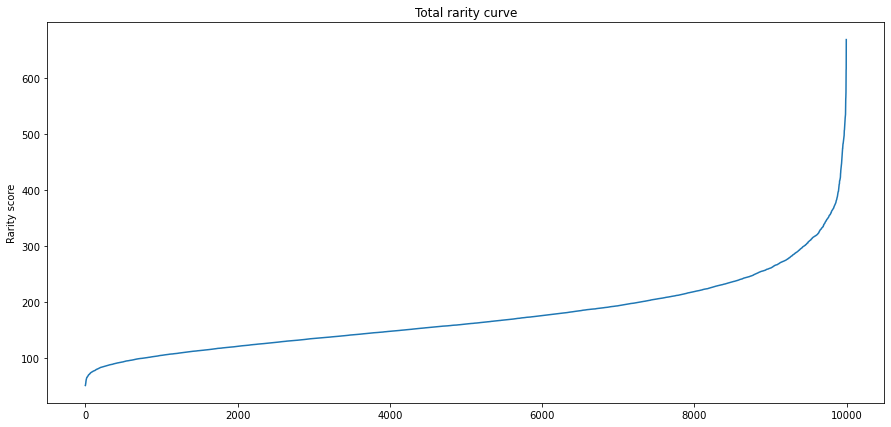

In [57]:
df['overall_rarity_score'].sort_values(ignore_index=True).plot(figsize=(15,7), title="Total rarity curve", ylabel="Rarity score")

In [ ]:
df.plot.hist(column=['overall_rarity_score'], bins=30, log=True)

## Trait rarities

In [72]:
columns = df.loc[:, df.columns.str.endswith('_attribute')].columns
columns

Index(['Earring_attribute', 'Background_attribute', 'Fur_attribute',
       'Clothes_attribute', 'Mouth_attribute', 'Eyes_attribute',
       'Hat_attribute'],
      dtype='object')

In [101]:
# iterater over rows and select traits and their scores
# store in a dictionary of all values
traits = {}
for col in columns:
    traitType = col.split('_')[0]
    ddf = df.loc[:, [traitType+'_attribute', traitType+'_rarity_score']].drop_duplicates(subset=traitType+'_attribute').dropna()
    traits.update(ddf.set_index(col)[traitType+'_rarity_score'].to_dict())

<AxesSubplot:>

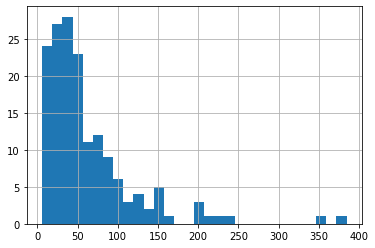

In [115]:
pd.Series(traits).hist(bins=30)